In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 1.一元线性回归习题

In [2]:
def warmUpExercise():
    A = np.ones((5,5))
    return A
A = warmUpExercise()
print(A)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


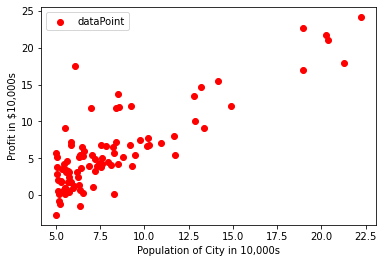

In [3]:
def plotData(filePath,train=False,theta=None):
    data = pd.read_csv(filePath,sep = ',',header=None)
    X = data.iloc[:,0].values
    y = data.iloc[:,1].values
    plt.scatter(X,y,c = 'r', label = 'dataPoint')
    if train == True:
        x = np.arange(X.min(),X.max(),0.5)
        y_pre = theta[0,0]*x + theta[1,0]
        plt.plot(x,y_pre,c='b',label='trainModel')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.legend()
    plt.show()

filePath = './ex1data1.txt'
plotData(filePath)

In [4]:
#导入X和y
data = pd.read_csv(filePath,sep=',',header=None)
X = data.iloc[:,0].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)

#初始化theta
theta = np.zeros((2,1))

In [5]:
#计算平方损失
def computeCost(X,y,theta):
    """
    description: 计算平方损失
    ---------
    param:
    X：m*1的array，表示特征
    y: m*1的array，表示标签
    theta: (n+1)*1的array，[w,b].T
    -------
    Returns: 平方差损失
    -------
    """
    m = X.shape[0]
    X = np.c_[X,np.ones((m,1))] #将X扩充一维元素全为1的列向量，方便偏差b的向量化
    y_pre = np.dot(X,theta)
    Cost = np.dot((y_pre-y).T,(y_pre-y))[0,0]/(2*m)
    return Cost
    
print(computeCost(X,y,theta))
print(X.shape)


32.07273387745567
(97, 1)


[[ 1.16636235]
 [-3.63029144]]


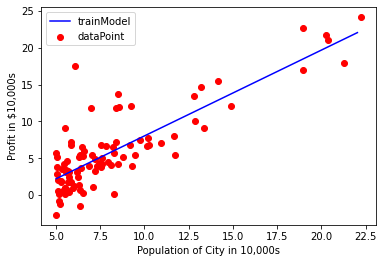

In [6]:
#梯度下降法训练模型
def gradientDescent(X, y, theta, Epochs, alpha, visual = False):
    """
    description: gradient descent
    ---------
    param:
    X：m*1的array，表示特征
    y: m*1的array，表示标签
    theta: (n+1)*1的array，[w,b].T
    Epochs:迭代次数
    alpha:学习率 
    -------
    Returns: 训练后的模型参数,训练的历史误差
    -------
    """
    m = X.shape[0]
    X_hat = np.c_[X,np.ones((m,1))] #将X扩充一维元素全为1的列向量，方便偏差b的向量化
    theta_train = theta.copy() #对theta进行深拷贝，防止函数中的变化影响到全局变量中theta
    Cost = [] #记录每次迭代的平方差损失
    for epoch in range(Epochs):
        y_pre = np.dot(X_hat,theta_train)
        Cost.append(computeCost(X,y,theta_train))
        theta_train += -(alpha/m)*(np.dot(X_hat.T,(y_pre-y)))
    if visual == True:
        plt.plot([i for i in range(len(Cost))], Cost, c='r',label='alpha = '+str(alpha))
        plt.xlabel('epochs')
        plt.ylabel('J')
        plt.legend()
        plt.show()

    return theta_train, Cost

trainTheta, Cost = gradientDescent(X, y, theta, Epochs=1500, alpha=0.01)
print(trainTheta)

#可视化模型训练的效果
plotData(filePath,train=True,theta=trainTheta)   
    

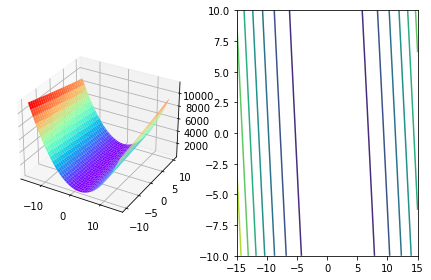

In [7]:
#可视化损失函数与theta的关系
from mpl_toolkits.mplot3d import Axes3D
def visualize(X,y):
    theta0 = np.linspace(-15,15,80)
    theta1 = np.linspace(-10,10,60)
    J = np.zeros((len(theta0),len(theta1)))
    for i in range(len(theta0)):
        for j in range(len(theta1)):
            theta = np.array([[theta0[i]],[theta1[j]]])
            J[i,j] = computeCost(X,y,theta)
    
    xx ,yy = np.meshgrid(theta0,theta1)
    fig = plt.figure()
    ax1 = fig.add_subplot(121,projection='3d')
    ax1.plot_surface(xx,yy,J.T,cmap='rainbow')

    ax2 = fig.add_subplot(122)
    ax2.contour(xx,yy,J.T)
    plt.tight_layout()
    plt.show()

visualize(X,y)

# 2. 多元线性回归习题

## 由于变量不止一个，所以需要增加归一化，另外观察不同学习率下损失函数迭代曲线

In [8]:
data = pd.read_csv('./ex1data2.txt',sep=',',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values.reshape(-1,1)
featureNum = X.shape[1] #特征的个数
theta = np.zeros((featureNum+1,1))

In [9]:
#标准归一化
def standardNorm(X):
    """
    description: 标准归一化，对每一个特征都进行归一化
    ---------
    param:
    X：数据集的特征
    -------
    Returns:
    -------
    """
    n = X.shape[1]
    for i in range(n):
        mean = X[:,i].mean()
        std = X[:,i].std()
        if std != 0:
            X[:,i] = (X[:,i] - mean)/std
        else:
            X[:,i] = 0
    return X

X_norm = standardNorm(X)
print('归一化之后第1个特征的均值：%.3f'%(X_norm[:,0].mean()))
print('归一化之后第1个特征的标准差：%.3f'%(X_norm[:,0].std()))

归一化之后第1个特征的均值：0.106
归一化之后第1个特征的标准差：0.722


In [10]:
#计算初始化theta的损失函数,任然使用之前定义的computeCost函数
computeCost(X_norm,y,theta)

65591548106.45744

In [11]:
trainTheta,Cost = gradientDescent(X_norm, y, theta, Epochs=100, alpha=0.05, visual=False)
print(trainTheta)

[[107964.18419276]
 [ 33137.39721881]
 [321010.92314802]]


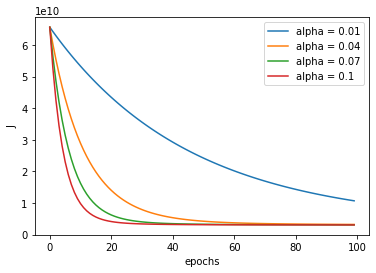

In [12]:
#多元(二元)问题的梯度下降
#依然使用之前定义的gradientDescent函数
lr = np.linspace(0.01,0.1,4)
for alpha in lr:
    trainTheta,Cost = gradientDescent(X_norm, y, theta, Epochs=100, alpha=alpha, visual=False)
    plt.plot([i for i in range(len(Cost))], Cost,label='alpha = '+str(alpha))

plt.xlabel('epochs')
plt.ylabel('J')
plt.legend()
plt.show()

# 3. 用最小二乘法：由于线性回归可以由最小二乘法构造平方差目标函数，该目标函数是凸函数，可以求得其闭式解

In [13]:
def normalEqn(X,y):
    m = X.shape[0]
    X_hat = np.c_[X,np.ones((m,1))]
    term = np.dot(X_hat.T,X_hat)
    term1 = np.linalg.inv(term)
    term2 = np.dot(term1,X_hat.T)
    result = np.dot(term2,y)
    return result

normalEqn(X_norm,y)

array([[123693.06633751],
       [ 16256.91543233],
       [324486.68818838]])